In [48]:
#IMPORTANTO O PANDAS E AS LIBS NECESSARIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
warnings.filterwarnings("ignore")


In [49]:
#CONFIGURANDO A QUANTIDADE DE CASA DECIMAIS DENTRO DO FLOAT
pd.set_option('display.float_format', '{:.2f}'.format)

In [50]:
#IMPORTANDO DF JÁ TRATADO
df_prod = pd.read_csv('/content/drive/MyDrive/Tech Challenge 1 modulo - FIAP/Dados Tratados/Producao.csv',sep=',')

In [51]:
df_prod

,id,categoria,tipo,quantidade(l)_1970,quantidade(l)_1971,quantidade(l)_1972,quantidade(l)_1973,quantidade(l)_1974,quantidade(l)_1975,quantidade(l)_1976,...,quantidade(l)_2013,quantidade(l)_2014,quantidade(l)_2015,quantidade(l)_2016,quantidade(l)_2017,quantidade(l)_2018,quantidade(l)_2019,quantidade(l)_2020,quantidade(l)_2021,quantidade(l)_2022
0,0,vinho de mesa,tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
1,0,vinho de mesa,branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
2,0,vinho de mesa,rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
3,1,vinho fino mesa,tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
4,1,vinho fino mesa,branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
5,1,vinho fino mesa,rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265
6,2,derivados,vinho leve,0,0,0,0,0,0,0,...,0,0,0,0,0,8000,0,0,0,0
7,2,derivados,vinho licoroso,0,0,0,0,0,0,0,...,100,36000,56000,24200,110820,124303,99485,48678,30000,67000
8,2,derivados,vinho composto,0,0,0,0,0,0,0,...,0,3000,0,0,0,0,0,0,160000,0
9,2,derivados,vinho orgânico,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18700,93884,88890


In [52]:
#PEGANDO SOMENTE OS ULTIMOS 15 ANOS DE PRODUÇÃO DE VINHO
df_15_vinho =  df_prod.iloc[:, [2] + list(range(-15, 0))]
df_15_vinho.head(10)

,tipo,quantidade(l)_2008,quantidade(l)_2009,quantidade(l)_2010,quantidade(l)_2011,quantidade(l)_2012,quantidade(l)_2013,quantidade(l)_2014,quantidade(l)_2015,quantidade(l)_2016,quantidade(l)_2017,quantidade(l)_2018,quantidade(l)_2019,quantidade(l)_2020,quantidade(l)_2021,quantidade(l)_2022
0,tinto,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
1,branco,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
2,rosado,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
3,tinto,27583032,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
4,branco,18812571,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
5,rosado,938898,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265
6,vinho leve,0,0,0,0,0,0,0,0,0,0,8000,0,0,0,0
7,vinho licoroso,65650,0,15000,0,0,100,36000,56000,24200,110820,124303,99485,48678,30000,67000
8,vinho composto,0,0,0,0,0,0,3000,0,0,0,0,0,0,160000,0
9,vinho orgânico,15000,0,0,5600,0,0,0,0,0,0,0,0,18700,93884,88890


In [53]:
#UTILIZANDO MELT PARA TRANSFORMAR O DATAFRAME EM FORMATO LONGO
df_prod_total_years = pd.melt(df_15_vinho, id_vars=['tipo'], var_name='Ano', value_name='Quantidade')
df_prod_total_years

,tipo,Ano,Quantidade
0,tinto,quantidade(l)_2008,241057928
1,branco,quantidade(l)_2008,42942053
2,rosado,quantidade(l)_2008,3506830
3,tinto,quantidade(l)_2008,27583032
4,branco,quantidade(l)_2008,18812571
...,...,...,...
145,rosado,quantidade(l)_2022,2197265
146,vinho leve,quantidade(l)_2022,0
147,vinho licoroso,quantidade(l)_2022,67000
148,vinho composto,quantidade(l)_2022,0


In [54]:
#AGRUPANDO O DATAFRAME POR ANO E SOMANDO QUANTIDADE
df_quantidade_max = df_prod_total_years.groupby(['Ano']).agg({'Quantidade':'sum'})
#EXIBINDO O RESULTADO
df_quantidade_max.index

Index(['quantidade(l)_2008', 'quantidade(l)_2009', 'quantidade(l)_2010',
       'quantidade(l)_2011', 'quantidade(l)_2012', 'quantidade(l)_2013',
       'quantidade(l)_2014', 'quantidade(l)_2015', 'quantidade(l)_2016',
       'quantidade(l)_2017', 'quantidade(l)_2018', 'quantidade(l)_2019',
       'quantidade(l)_2020', 'quantidade(l)_2021', 'quantidade(l)_2022'],
      dtype='object', name='Ano')

In [55]:
df_quantidade_max.head(15)

,Quantidade
Ano,
quantidade(l)_2008,334921962
quantidade(l)_2009,245318774
quantidade(l)_2010,220088693
quantidade(l)_2011,305444820
quantidade(l)_2012,257977767
quantidade(l)_2013,242686852
quantidade(l)_2014,234676437
quantidade(l)_2015,247513542
quantidade(l)_2016,104413841


In [56]:
#CALCULANDO A ESTATISTICA DESCRITIVA PARA OS VINHOS PRODUZIDOS NOS ULTIMOS 15 ANOS
df_quantidade_max.describe()

,Quantidade
count,15.00
mean,236627268.07
std,57914751.11
min,104413841.00
25%,218873785.00
50%,242699298.00
75%,257596463.00
max,334921962.00


In [58]:
#CALCULANDO INTERVALO INTERQUARTIL PARA OS VINHOS PRODUZIDOS NOS ULTIMOS 15 ANOS
Q1 = df_quantidade_max['Quantidade'].quantile(0.25)
Q3 = df_quantidade_max['Quantidade'].quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [59]:
#VERIFICANDO QUAIS SÃO OS OUTLIERS
selecao = (df_quantidade_max['Quantidade'] < limite_inferior) | (df_quantidade_max['Quantidade'] > limite_superior)
outlier = df_quantidade_max[selecao]
outlier

,Quantidade
Ano,
quantidade(l)_2008,334921962
quantidade(l)_2016,104413841
quantidade(l)_2020,156784478


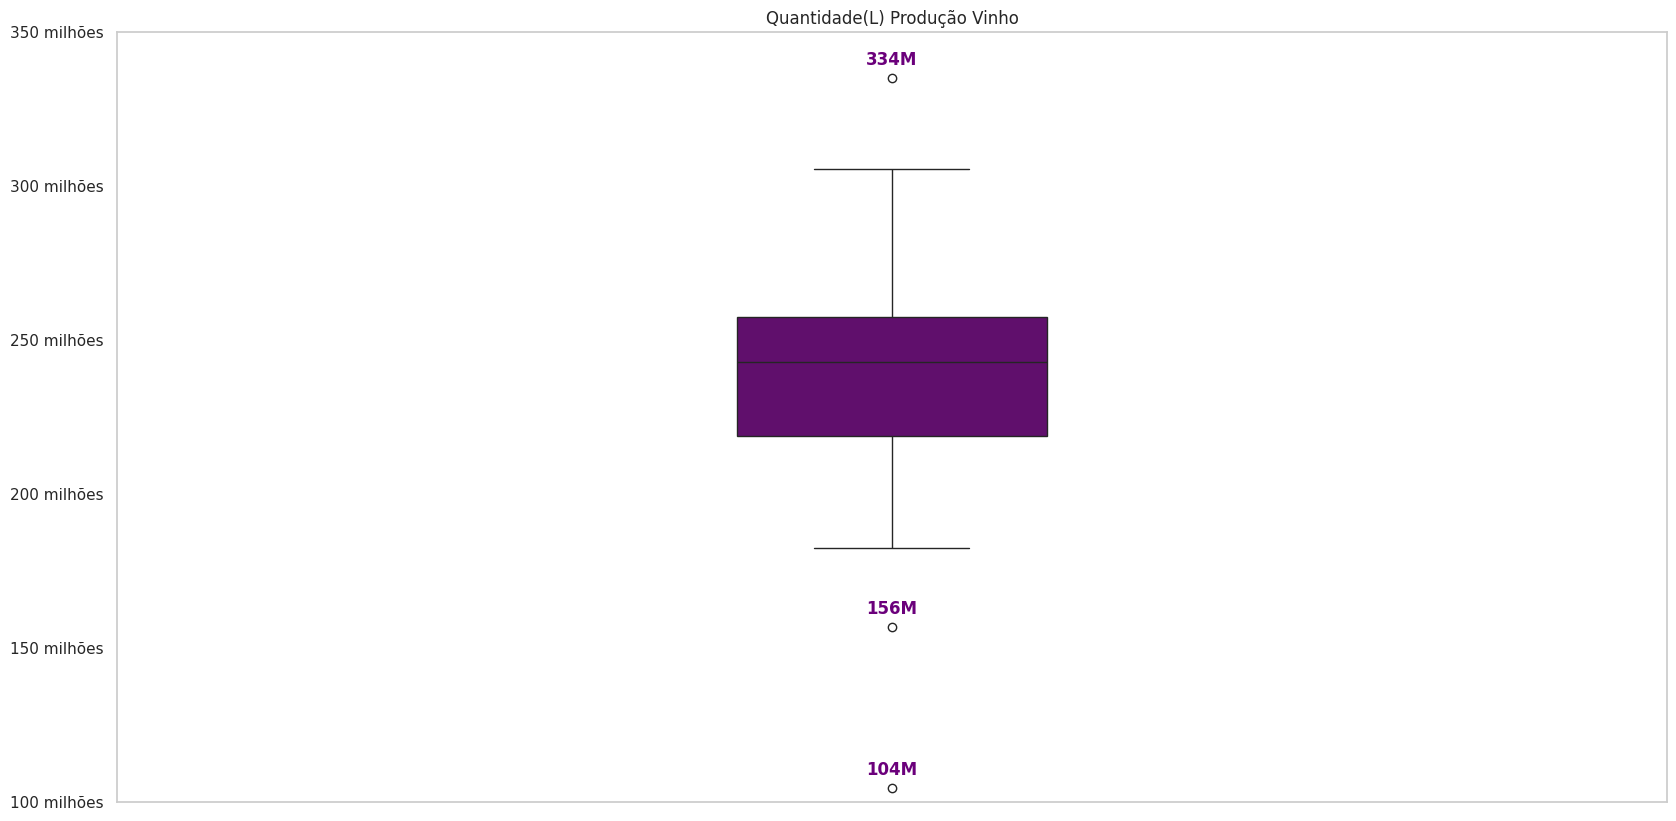

In [60]:
#CRIANDO UM DataFrame PARA FACILITAR A ITERAÇÃO SOBRE OS OUTLIERS
df_prod_year_qtd = {'Ano': ['quantidade(l)_2008', 'quantidade(l)_2009', 'quantidade(l)_2010',
                 'quantidade(l)_2011', 'quantidade(l)_2012', 'quantidade(l)_2013',
                 'quantidade(l)_2014', 'quantidade(l)_2015', 'quantidade(l)_2016',
                 'quantidade(l)_2017', 'quantidade(l)_2018', 'quantidade(l)_2019',
                 'quantidade(l)_2020', 'quantidade(l)_2021', 'quantidade(l)_2022'],
        'Quantidade': [334921962, 245318774, 220088693, 305444820, 257977767,
                       242686852, 234676437, 247513542, 104413841, 299663877,
                       257215159, 182344644, 156784478, 217658877, 242699298]}
df = pd.DataFrame(df_prod_year_qtd)
#CRIANDO BOXPLOT COM SEABORN
plt.figure(figsize=(20, 10))
ax = sns.boxplot(y=df['Quantidade'], showfliers=True, width=0.2, palette=custom_palette)
plt.ylim(100000000, 350000000)
ax.set_yticklabels([])
plt.title('Quantidade(L) Produção Vinho')
plt.ylabel('')
ax.grid(False)
#CONFIGURANDO ROTULOS PARA OUTLIERS
outliers = ['334921962', '104413841', '156784478']
for valor in outliers:
    ponto = df[df['Quantidade'] == int(valor)]
    plt.annotate(f'{int(ponto["Quantidade"].values[0]/1e6)}M', (0, ponto["Quantidade"].values[0]),
                 textcoords="offset points", xytext=(0, 10), ha='center', color='#6B007B', fontsize=12, fontweight='bold')
#CONFIGURANDO ESCALA PARA O EIXO Y
plt.yticks([y for y in ax.get_yticks()], [f'{int(y/1e6)} milhões' for y in ax.get_yticks()])
plt.show()

In [61]:
#TRATANDO DF PARA CONSTRUIR GRAFICO DE LINHAS
df_qtd_line = df_quantidade_max.copy()
df_qtd_line.index = df_qtd_line.index.str.split('_').str[-1]
df_qtd_line.index = pd.to_datetime(df_qtd_line.index, format='%Y')
df_qtd_line.reset_index(inplace=True)
df_qtd_line.head(15)

,Ano,Quantidade
0,2008-01-01,334921962
1,2009-01-01,245318774
2,2010-01-01,220088693
3,2011-01-01,305444820
4,2012-01-01,257977767
5,2013-01-01,242686852
6,2014-01-01,234676437
7,2015-01-01,247513542
8,2016-01-01,104413841
9,2017-01-01,299663877


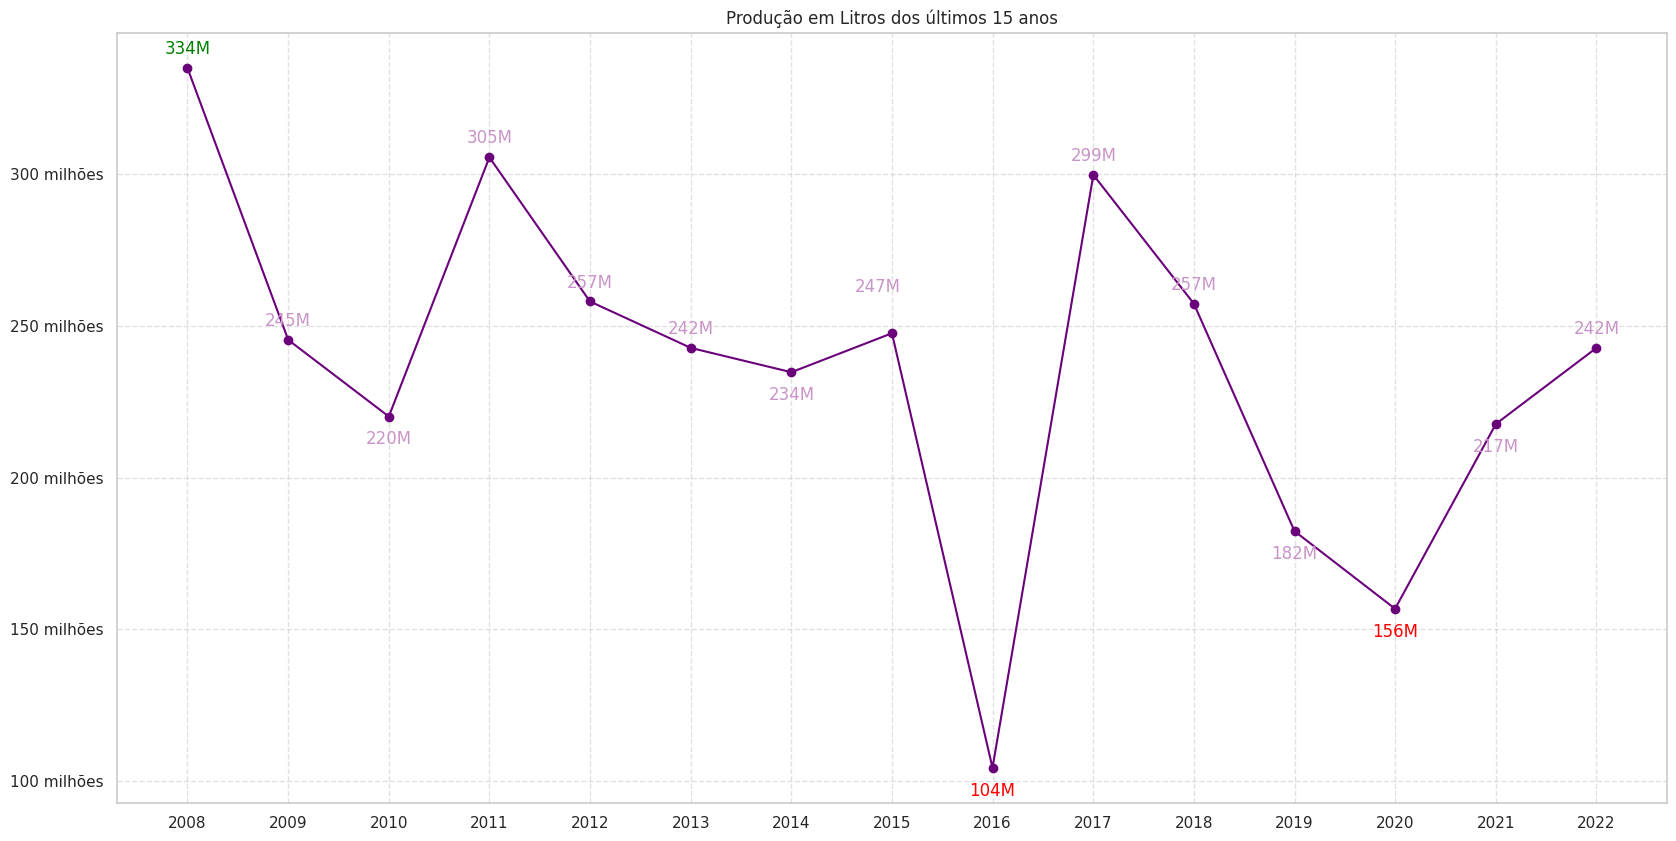

In [62]:
#EXPLORANDO DADOS COM GRAFICOS DE LINHA
plt.rc('figure',figsize=(20,10))
linhas = plt.plot(df_qtd_line['Ano'], df_qtd_line['Quantidade'], marker='o', linestyle='-', color='#6B007B')
ax = plt.gca()
ax.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
def formatar_milhoes(x, pos):
    return f'{int(x/1e6)} milhões'
ax.yaxis.set_major_formatter(FuncFormatter(formatar_milhoes))
plt.title('Produção em Litros dos últimos 15 anos')
for i, valor in enumerate(df_qtd_line['Quantidade']):
    offset = 10 if valor > df_qtd_line['Quantidade'].mean() else -20
    cor = 'Green' if df_qtd_line['Ano'].dt.year.iloc[i] == 2008 else ('Red' if df_qtd_line['Ano'].dt.year.iloc[i] == 2016 or df_qtd_line['Ano'].dt.year.iloc[i] == 2020 else '#c994c7')
    if df_qtd_line['Ano'].dt.year.iloc[i] == 2015:
        offset = 30 if valor > df_qtd_line['Quantidade'].mean() else -30
        plt.annotate(f'{int(valor/1e6)}M', (df_qtd_line['Ano'].iloc[i], valor), textcoords="offset points", xytext=(-10, offset), ha='center',color=cor)
    else:
        plt.annotate(f'{int(valor/1e6)}M', (df_qtd_line['Ano'].iloc[i], valor), textcoords="offset points", xytext=(0, offset), ha='center',color=cor)
ax.grid(True, linestyle='--', alpha=0.6)



In [63]:
df_qtd_line.head(15)

,Ano,Quantidade
0,2008-01-01,334921962
1,2009-01-01,245318774
2,2010-01-01,220088693
3,2011-01-01,305444820
4,2012-01-01,257977767
5,2013-01-01,242686852
6,2014-01-01,234676437
7,2015-01-01,247513542
8,2016-01-01,104413841
9,2017-01-01,299663877


In [64]:
df_qtd_line.describe()

,Quantidade
count,15.00
mean,236627268.07
std,57914751.11
min,104413841.00
25%,218873785.00
50%,242699298.00
75%,257596463.00
max,334921962.00


##CONSTRUINDO BOXPLOT DO DataFrame Exportação

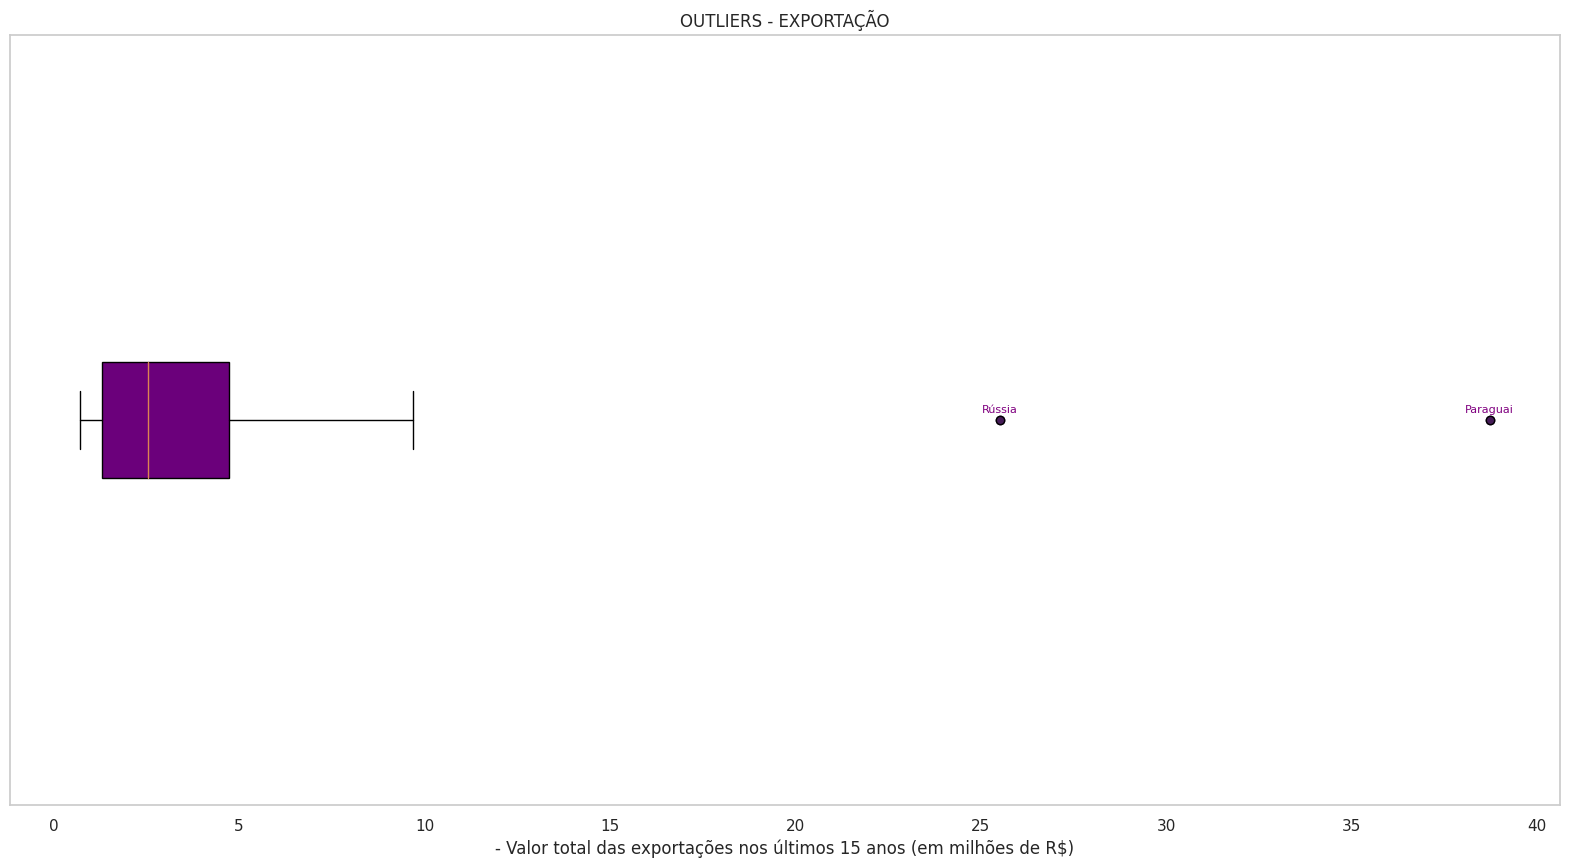

In [65]:
#CRIANDO DataFrame PARA FACILITAR A VISUALIZAÇÃO
dados = {
    'Paises': ['Paraguai', 'Rússia', 'Estados Unidos', 'China', 'Reino Unido', 'Espanha',
               'Países Baixos', 'Alemanha', 'Japão', 'Haiti', 'Bélgica', 'Uruguai',
               'Canadá', 'Suíça', 'França'],
    'Valor': [38719031, 25504484, 9684567, 4746525, 4711464, 3808552, 3791611,
              2546394, 2377716, 2327208, 1395226, 1219878, 1097417, 906264, 720359]
}

df = pd.DataFrame(dados)

#CONVETERENDO VALORES PARA MILHÕES PARA FACILITAR A VISUALIZAÇÃO
df['Valor Milhoes'] = df['Valor'] / 1000000

#CALCULO INTERQUARTÍLICO PARA CONSTRUÇÃO DO BOXPLOT
q1 = df['Valor Milhoes'].quantile(0.25)
q3 = df['Valor Milhoes'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['Valor Milhoes'] < q1 - 1.5 * iqr) | (df['Valor Milhoes'] > q3 + 1.5 * iqr)]

#CRIANDO E CONFIGURANDO BOXPLOT
plt.figure(figsize=(20, 10))
box = plt.boxplot(df['Valor Milhoes'], vert=False, patch_artist=True)
plt.scatter(outliers['Valor Milhoes'], [1] * len(outliers), marker='o', color='#461C58')

for i, row in outliers.iterrows():
    plt.annotate(row['Paises'], (row['Valor Milhoes'], 1), textcoords="offset points", xytext=(0, 5), ha='center',
                 fontsize=8, color='purple')
for patch in box['boxes']:
    patch.set_facecolor('#6B007B')
plt.title('OUTLIERS - EXPORTAÇÃO')
plt.xlabel('- Valor total das exportações nos últimos 15 anos (em milhões de R$)')
plt.yticks([])
plt.grid(False)
plt.show()